# Key Takeaways From This Presentation (a short polemic)


It is worthwhile to...


- ...build an automated ('M2M' or 'API-based') connection between my work and data resources...
  - ...because! **flexibility**
- ...build such that I can go away for 6 months and upon return pick up where I left off
- ...ask 'what data resources are out there?' 
  - validate or provide a baseline for (say) CA data
  - suggest new causal links
- ...consider building a "common methods" xyz.py file for import (I use 'kilroy.py' here).

# Data exploration using GLODAP


This notebook touches on a number of useful pieces/components from the [Global Ocean Data Analysis Project](https://en.wikipedia.org/wiki/Global_Ocean_Data_Analysis_Project) or **GLODAP**. GLODAP (now in version 2) 
is intended to be a climatology snapshot for the world ocean carbon cycle. As such it is not a time-series
dataset; rather it is a 'best possible field' round about the year 2000 give or take a decade. 
I should mention that GLODAP is supported by NOAA, DOE and NSF. 


* What is the inspection/dicsovery process like for GLODAP?
* Is there any direct comparative possible with the Cabled Array?


It took some time to infer the input time range for GLODAP: Roughly 1972 through 2013. The data are compiled 
first via cruises and then by some interpolation/extrapolation methods. So it represents a sort of stable 
global reference; and it is a nice starting point. 


The technical points this notebook touches upon include...

- Using a local .py file to store utility methods; example 'kilroy.Show()' for displaying images stored on GitHub
- Displaying images stored on GitHub
- Linking to documentation e.g. on Wikipedia
- Importing useful libraries: pandas, netcdf, xarray, and boto for access to the AWS cloud
- Looking at the contents of an S3 object storage bucket on the AWS cloud using boto
- Checking the local file system contents
- Importing data from the AWS cloud if necessary to the local file system
- Attaching data files to an xarray dataset
- Looking at the dataset structure / metadata
- Getting some numerical values from the dataset
- Displaying the dataset with an associated control parameter attached to a slider
- Looking at an indexed parameter (depth in meters in our case) in terms of what values are produced by the index


# You Can't Debug A Ghost


I have a dopey set of methods in **kilroy.py**. Dopey in part because of a hard-coded path. I have to change this 
every time I switch Jupyter Hubs... and this time (after I fixed the path) the notebook still insisted on the 
'bad path' error. I had to restart the kernel and then everything was just fine... the point being that it lost 
me 20 minutes. This sort of micro-detail in a programming environment drives me absolutely bananas.

In [1]:
!cat kilroy.py

def Show(folder, filename, width, height):
    import requests
    import shutil
    from PIL import Image
    fullpath = 'https://raw.githubusercontent.com/robfatland/othermathclub/master/images/' + folder + '/' + filename
    a = requests.get(fullpath, stream = True)
    outf = './tmp.jpg'
    if a.status_code == 200:
        with open(outf, 'wb') as f:
            a.raw.decode_content = True
            shutil.copyfileobj(a.raw, f)
    return Image.open(outf).resize((width,height),Image.ANTIALIAS)

# A proper version of 'Show' with username, repo name, folder name, sub-folder name, and filename + render dimensions
def ShowImageFromGitHub(un, rn, fn, sfn, filename, width, height):
    import requests
    import shutil
    from PIL import Image
    fullpath = 'https://raw.githubusercontent.com/' + un + '/' + \
		    rn + '/master/' + fn + '/' + sfn + '/' + filename
    a = requests.get(fullpath, stream = True)
    outf = './tmp.jpg'
    if a.status_code == 200:
        with open(outf,

In [1]:
import kilroy
dir(kilroy)

['Show',
 'ShowImageFromGitHub',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

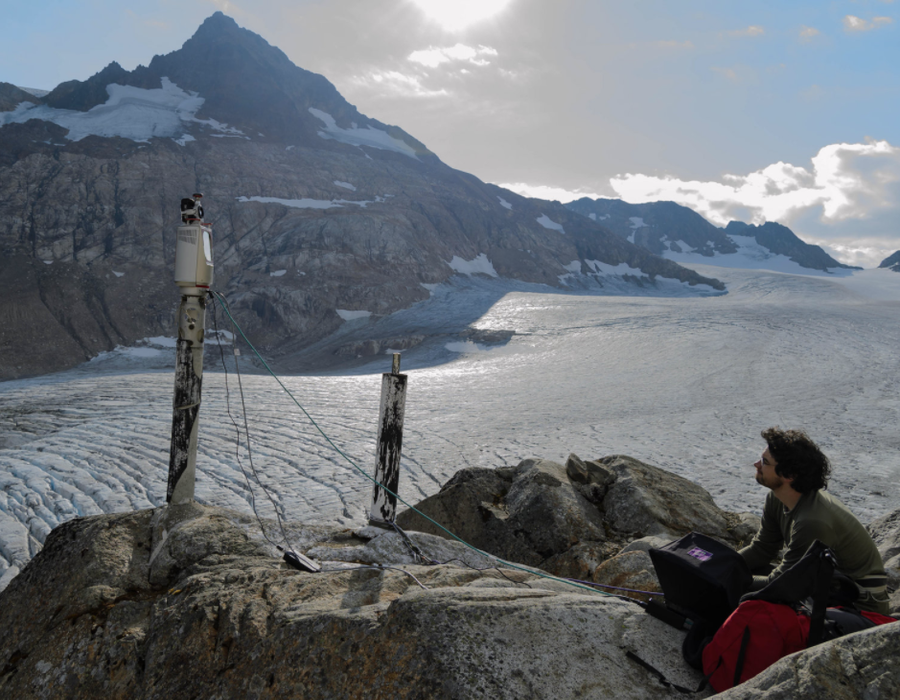

In [2]:
kilroy.Show('landscape','David_Shean_using_UW_terrestrial_laser_scanner_at_South_Cascade_Glacier.png', 900,700)

*David Shean just prior to being rescued by eagles.*



## Citations


I was having trouble getting to the basic story so I wrote everyone involved in the GLODAP 2 release and heard back from Alex Kozyr at NOAA. He writes:


```

GLODAPv2 is described in two publications in Earth System Science Data (Olsen et al., 2016 and Lauvset et al., 2016) and in one NDP document (Olsen et al., 2017). The NDP is a brief summary of the two ESSD papers. Full citations are provided below.

Whenever GLODAPv2 is used, the following citations must be included:

For data and data product: Olsen et al., 2016 and Key et al., 2015

For mapped product: Lauvset et al., 2016 and Key et al., 2015

Citing the Earth System Science Data publications is essential as this gives the team traceable citations and also enables tracking of GLODAPv2 use. This is important for justifying and sustaining the effort.

Citations
Olsen, A., R. M. Key, S. van Heuven, S. K. Lauvset, A. Velo, X. Lin, C. Schirnick, A. Kozyr, T. Tanhua, M. Hoppema, S. Jutterström, R. Steinfeldt, E. Jeansson, M. Ishii, F. F. Pérez and T. Suzuki. The Global Ocean Data Analysis Project version 2 (GLODAPv2) – an internally consistent data product for the world ocean, Earth Syst. Sci. Data, 8, 297–323, 2016, doi:10.5194/essd-8-297-2016.

Lauvset, S. K, R. M. Key, A. Olsen, S. van Heuven, A. Velo, X. Lin, C. Schirnick, A. Kozyr, T. Tanhua, M. Hoppema, S. Jutterström, R. Steinfeldt, E. Jeansson, M. Ishii, F. F. Pérez, T. Suzuki and S. Watelet. A new global interior ocean mapped climatology: the 1°x1° GLODAP version 2, Earth Syst. Sci. Data, 8, 325–340, 2016, doi:10.5194/essd-8-325-2016.

The GLODAPv2 data products latest publication at NCEI: https://www.nodc.noaa.gov/ocads/data/0162565.xml

Olsen, A.; Key, R. M.; Lauvset, S. K.; Kozyr, A.; Tanhua, T.; Hoppema, M.; Ishii, M.; Jeansson, E.; van Heuven, S.; Jutterström, S.; Schirnick, C.; Steinfeldt, R.; Suzuki, T.; Lin, X.; Velo, A.; Pérez, F. F. (2017). Global Ocean Data Analysis Project, Version 2 (GLODAPv2) (NCEI Accession 0162565). Version 1.1. NOAA National Centers for Environmental Information. Dataset. doi:10.7289/V5KW5D97
```

## Glodap data exploration

 
[Read about glodap on Wikipedia](https://en.wikipedia.org/wiki/Global_Ocean_Data_Analysis_Project).


Run the sequence of cells that follow.



In [5]:
# Either from the terminal or via 'bang': These should be installed in the kernel already but here are some installs
# !conda install netcdf4 -y
# !conda install xarray -y

# This is a temporary as-needed install
!conda install boto -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    boto:           2.48.0-py36h6e4cd66_1         defaults   
    libgfortran-ng: 7.2.0-h9f7466a_2              defaults   
    libopenblas:    0.2.20-h9ac9557_4             defaults   

The following packages will be DOWNGRADED:

    blas:           1.1-openblas                  conda-forge --> 1.0-noblas                  conda-forge
    numpy:          1.14.0-py36_blas_openblas_200 conda-forge [blas_openblas] --> 1.14.0-py36_nomklh7cdd4dd_0 defaults    [nomkl]
    scipy:          1.0.0-py36_blas_openblas_201  conda-forge [blas_openblas] --> 1.0.0-py36_nomklh9d91e6a_0  defaults    [nomkl]

blas-1.0-nobla 100% |################################| Time: 0:00:00   1.73 MB/s
libgfortran-ng 100% |################################| Time: 0:00:00   7.06 MB/s
libopenblas-0. 100% |################################| Time:

### Import some tools

Python has powerful tools available. To use them we need to issue some *import* commands. It is very much
like Python is the body of an airplane... and we are sitting at the controls... but if we want to fly we 
need to import two wings and a tail and an engine and some wheels. That's what we do next. 


If the cell below produces an error message: It may be that the 
cell above did not run properly. You might need to go run that one again.

Run the cell below.

In [7]:
# If this cell throws a 'boto' error run the install in the cell above

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import boto
from boto.s3.key import Key
import xarray as xr

### Inspecting an AWS S3 object storage bucket from the HIMAT project (public-read)

The following cell uses boto to list the upper level directories.

In [9]:
# We 'happen to know' the glodap files reside on the 'himatdata' s3 bucket

connection = boto.connect_s3(anon=True)
bucket = connection.get_bucket('himatdata')
data_dir = './'

# This block of bespoke-y code prints all the root directory names from the AWS S3 'himatdata' bucket
dir_list = []
for key in bucket.list():
    keyname = str(key.name.encode('utf-8'))
    if '/' in keyname:
        cd = keyname.split('/')[0].strip("b'").strip('b"')
        if cd not in dir_list:
            dir_list.append(cd)
            print(cd)

GRACE
LIS
Microclimate
WWT Tours
cmr
glodap


In [10]:
# Now that we see there is a 'glodap' directory: List all the contents of that
file_list = []
for key in bucket.list():
    keyname = str(key.name.encode('utf-8'))
    if 'glodap/' in keyname:
        cd = keyname.strip("b'").strip('b"')
        print(cd)

glodap/
glodap/GLODAPv2.2016b.Cant.nc
glodap/GLODAPv2.2016b.NO3.nc
glodap/GLODAPv2.2016b.OmegaA.nc
glodap/GLODAPv2.2016b.OmegaC.nc
glodap/GLODAPv2.2016b.PI_TCO2.nc
glodap/GLODAPv2.2016b.PO4.nc
glodap/GLODAPv2.2016b.TAlk.nc
glodap/GLODAPv2.2016b.TCO2.nc
glodap/GLODAPv2.2016b.oxygen.nc
glodap/GLODAPv2.2016b.pHts25p0.nc
glodap/GLODAPv2.2016b.pHtsinsitutp.nc
glodap/GLODAPv2.2016b.salinity.nc
glodap/GLODAPv2.2016b.silicate.nc
glodap/GLODAPv2.2016b.temperature.nc


In [11]:
# Ok, great, we see there are 14 data files available; let's just consider three of them
# This cell assigns filenames based on 'filename includes 'glodap' and data type of interest'

for key in bucket.list(): 
    filename = key.name.encode('utf-8')
    if b'glodap' in filename: 
        if b'salinity.nc' in filename: 
            print ('salinity file is', filename)
            salinityfilename = filename
        if b'temperature.nc' in filename: 
            print ('temperature file is', filename)
            temperaturefilename = filename
        if b'oxygen.nc' in filename: 
            print('oxygen file is', filename)
            oxygenfilename = filename            

local_salinity_filename = data_dir + 'glodap_salinity.nc'
local_temperature_filename = data_dir + 'glodap_temperature.nc'
local_oxygen_filename = data_dir + 'glodap_oxygen.nc'

oxygen file is b'glodap/GLODAPv2.2016b.oxygen.nc'
salinity file is b'glodap/GLODAPv2.2016b.salinity.nc'
temperature file is b'glodap/GLODAPv2.2016b.temperature.nc'


### Check if our data are present


We want to look at the world's oceans in terms of oxygen levels, salinity and temperature.
There are three data files we will use for this.  Either they are already here on this computer 
or they are not. If not we will have to go get them from the cloud.


Run the cell below and if it produces three lines like this: 

```
-rw-r--r-- 1 nbuser nbuser 102664419 Dec  1 03:21 glodap_oxygen.nc
-rw-r--r-- 1 nbuser nbuser 102664370 Dec  1 03:21 glodap_salinity.nc
-rw-r--r-- 1 nbuser nbuser 102664315 Dec  1 03:21 glodap_temperature.nc
```

then we can skip the Python cell after that. 

In [12]:
!pwd
!ls -al ./*.nc

/home/jovyan/cahw2018_tutorials/rob
-rw-rw-r-- 1 jovyan 1000 102664419 Jan 18  2017 ./glodap_oxygen.nc
-rw-rw-r-- 1 jovyan 1000 102664370 Jan 18  2017 ./glodap_salinity.nc
-rw-rw-r-- 1 jovyan 1000 102664315 Jan 18  2017 ./glodap_temperature.nc


### Get the data if necessary

Don't run the following cell if the data files are already present (see result above). 
Remember that the Key command was imported above from boto.s3.key and it operates on a
connection to an S3 bucket (named 'bucket' here); so Key (and hence 'k') act as the
interface to the bucket, including the useful copy method .get_contents_to_filename().


In [ ]:
# This Python code copies three data files from the AWS cloud to the local file system
k = Key(bucket)
k.key = salinityfilename
k.get_contents_to_filename(local_salinity_filename)
k.key = temperaturefilename
k.get_contents_to_filename(local_temperature_filename)
k.key = oxygenfilename
k.get_contents_to_filename(local_oxygen_filename)

# If this works you should see three 100MByte files listed
!ls -al ./glodap_*.nc

### Assuming we have three NetCDF files

Let's attach three xarray Datasets to these three data files; and then look at the structure of one of them (dissolved oxygen)

In [13]:
# This code assigns our data files to three distinct dataset objects
print (local_salinity_filename)
dsSal = xr.open_mfdataset(local_salinity_filename)
dsTemp = xr.open_mfdataset(local_temperature_filename)
dsO2 = xr.open_mfdataset(local_oxygen_filename)
dsO2          # This prints the structure of the oxygen dataset below

./glodap_salinity.nc


<xarray.Dataset>
Dimensions:        (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon            (lon) float64 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 ...
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
Dimensions without coordinates: depth_surface, snr
Data variables:
    oxygen         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    oxygen_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean     (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std      (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N        (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    oxygen_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    SnR 

### What does this printout tell me? 

It seems that the dissolved oxygen file actually gives me nine values at each grid point. Furthermore it seems to 
be gridded by latitude, longitude and depth... but none of these need be evenly spaced. Rather they are spelled out
explicitly. So a coming step will be to print some of these numerical values.


But first let's cry some...


### Tears of frustration


The above printout is fine but for the fact that some **Attributes** are truncated. I have no idea what 
the entire comment says; nor do I know what units my dissolved oxygen data are in. What to do? An xarray Dataset 
should be able to cough up this information... 


I tried some 'thrashing about' like `dsO2['Attributes']['Description'])` and eventually arrived at 
the simple solution: xarray Dataset **Attributes** print nicely as follows...

```
print(dsO2.Description)
print(dsO2.Citation)
```

But the units of dissolved oxygen? This is *not* in **Attributes**. It would make more sense to associate units 
directly with the data; and this is correct. I used the 'dir' Python command to dive down into Dataset components.
dsO2 (as a Dataset) has a component called oxygen which in turn has a sub-component called units; and this will print. 

In [14]:
# print(dsO2.Comment) # garbled text. Norwegian?
# print('\n')
print(dsO2.Description)             # The description is fine as far as it goes but does not indicate units.
print('\n')
print(dsO2.Citation)

# Run the 'directory' operation on dsO2 to find oxygen; on dsO2.oxygen to find units; then...
#dir(dsO2.oxygen.units)

# print units
print("\n" + dsO2.oxygen.units)

1 X 1 global mapped field of dissolved molecular oxygen from the GLODAPv2 data product. Mapping is performed using the DIVA software (Troupin et al., 2012). Error fields are calculated using the clever poor mans error calculation method in DIVA (Beckers et al., 2014). The error fields represent the mapping error only, and does not include measurement or calculation uncertainties in the input data.


Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Are, van Heuven, Steven, Velo, Anton, Lin, Xiaohua, Schirnick, Carsten, Kozyr, Alex, Tanhua, Toste, Hoppema, Mario, Jutterstrom, Sara, Steinfeldt, Reiner, Jeansson, Emil, Ishii, Masao, Perez, Fiz F., Suzuki, Toru, and Watelet, Sylvain: A new global interior ocean mapped climatology: the 1x1 GLODAP version 2, Earth Syst. Sci. Data. Discuss., doi:10.5194/essd-2015-43, in review, 2016.

micro-mol kg-1


### Ready to go

Let's print a few oxygen data values, indexing depth, latitude and longitude. At the bottom of this page 
(if there is time) I will include a profile at the cabled array.

In [15]:
# This code indexes into the Oxygen dataset and prints a few example oxygen values
dsO2['oxygen'][0:2,50:52,170:172].values   # a few dissolved oxygen values near the surface

array([[[238.48782349, 238.15356445],
        [234.73210144, 233.86155701]],

       [[238.48214722, 238.13267517],
        [234.77105713, 233.89480591]]])

The next cell sequence presents all three data types as subsequent pseudo-maps. 
There is a slider for each, selecting a depth index. The actual depth is printed on the chart.

In [16]:
# These imports give us control sliders that we use for selecting depth slices from the dataset
from ipywidgets import *
from traitlets import dlink

# This creates a 2D color-coded view of oxygen at the surface, attaching a slider to a depth parameter
def plotOxygen(depth_index):
    a=dsO2['oxygen'].sel(depth_surface = depth_index)
    a.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=150, vmax=350)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(28, 50, 'oxygen dissolved in', fontsize = '20')
    plt.text(28, 42, '     ocean water   ', fontsize = '20')

# This is the interactive slider
interact(plotOxygen, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='depth_index', max=32), Output()), _dom_classes=('widget-interact',))

<function __main__.plotOxygen>

In [17]:
def plotSalinity(depth_index):
    b = dsSal['salinity'].sel(depth_surface = depth_index)
    b.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=33, vmax=36)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'salinity of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')
    
interact(plotSalinity, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='depth_index', max=32), Output()), _dom_classes=('widget-interact',))

<function __main__.plotSalinity>

In [18]:
def plotTemperature(depth_index):
    c=dsTemp['temperature'].sel(depth_surface = depth_index)
    c.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=0, vmax=23)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'temperature of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')

interact(plotTemperature, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))   

interactive(children=(IntSlider(value=0, continuous_update=False, description='depth_index', max=32), Output()), _dom_classes=('widget-interact',))

<function __main__.plotTemperature>

### Depth from index?


As noted the slider chooses a depth index on 0--32. Here is the conversion:

In [19]:
# This code pulls out the various available depths (in meters) of the dataset indexed slices
print (dsTemp['Depth'].values[10])
print ('    ')
print (dsTemp['Depth'].values)

250.0
    
[   0.   10.   20.   30.   50.   75.  100.  125.  150.  200.  250.  300.
  400.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500.
 1750. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.]
